## Brad Tombers - Teaching Trust Performance Task

Throughout this document, I hope to demonstrate that I can find solutions efficiently and convey results directly and thoroughly.  As you follow my code, you'll find comments that describe my thought process and methods for solving the task.  To maximize the clarity of my code, I split some tasks into several steps, even if the same thing could be done in fewer lines.  

### Assumptions
Because the task did not request comparisons between 2016 and 2017, I only analyzed results from 2017. Also, I assumed that values of ".", -1 and -3 are not significant, and so they were changed to zero so they would not affect the calculations. This means that some subgroups have no testing data.  I assume this is because either there are no observations of that type, or the data is a subset of all testing data.

Following the analysis, you'll find a description of my solution, what I learned in doing this performance task, and how I came about that knowledge. 

## Wrangling and Cleaning the Data

In [38]:
# import necessary packages and format output for optimal viewing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width',1000)

# read in file as a pandas DataFrame
df = pd.read_csv("Teaching Trust Jr. Data Scientist data subset - Sheet1.csv")

# view the first ten rows
df.head(10)

,CAMPUS,GRDTYPE,CA00AR01016D,CA00AR01S16N,CB00AR01016D,CB00AR01S16N,CW00AR01016D,CW00AR01S16N,CH00AR01016D,CH00AR01S16N,CI00AR01016D,CI00AR01S16N,C200AR01016D,C200AR01S16N,C300AR01016D,C300AR01S16N,C400AR01016D,C400AR01S16N,CF00AR01016D,CF00AR01S16N,CM00AR01016D,CM00AR01S16N,CE00AR01016D,CE00AR01S16N,CS00AR01016D,CS00AR01S16N,CR00AR01016D,CR00AR01S16N,CL00AR01016D,CL00AR01S16N,CA00AR01S16R,CB00AR01S16R,CW00AR01S16R,CH00AR01S16R,CI00AR01S16R,C200AR01S16R,C300AR01S16R,C400AR01S16R,CF00AR01S16R,CM00AR01S16R,CE00AR01S16R,CS00AR01S16R,CR00AR01S16R,CL00AR01S16R,CA00AR01017D,CA00AR01S17N,CB00AR01017D,CB00AR01S17N,CW00AR01017D,CW00AR01S17N,CH00AR01017D,CH00AR01S17N,CI00AR01017D,CI00AR01S17N,C200AR01017D,C200AR01S17N,C300AR01017D,C300AR01S17N,C400AR01017D,C400AR01S17N,CF00AR01017D,CF00AR01S17N,CM00AR01017D,CM00AR01S17N,CE00AR01017D,CE00AR01S17N,CS00AR01017D,CS00AR01S17N,CR00AR01017D,CR00AR01S17N,CL00AR01017D,CL00AR01S17N,CA00AR01S17R,CB00AR01S17R,CW00AR01S17R,CH00AR01S17R,CI00AR01S17R,C200AR01S17R,C300AR01S17R,C400AR01S17R,CF00AR01S17R,CM00AR01S17R,CE00AR01S17R,CS00AR01S17R,CR00AR01S17R,CL00AR01S17R,CA00AR04216N,CA00AR04216D,CI00AR04216N,CI00AR04216D,CB00AR04216N,CB00AR04216D,CH00AR04216N,CH00AR04216D,CW00AR04216N,CW00AR04216D,C200AR04216N,C200AR04216D,C300AR04216N,C300AR04216D,C400AR04216N,C400AR04216D,CM00AR04216N,CM00AR04216D,CF00AR04216N,CF00AR04216D,CS00AR04216N,CS00AR04216D,CE00AR04216N,CE00AR04216D,CR00AR04216N,CR00AR04216D,CL00AR04216N,CL00AR04216D,CA00AR04216R,CB00AR04216R,CH00AR04216R,CW00AR04216R,CI00AR04216R,C200AR04216R,C300AR04216R,C400AR04216R,CM00AR04216R,CF00AR04216R,CS00AR04216R,CE00AR04216R,CR00AR04216R,CL00AR04216R,CA00AR04217N,CA00AR04217D,CI00AR04217N,CI00AR04217D,CB00AR04217N,CB00AR04217D,CH00AR04217N,CH00AR04217D,CW00AR04217N,CW00AR04217D,C200AR04217N,C200AR04217D,C300AR04217N,C300AR04217D,C400AR04217N,C400AR04217D,CM00AR04217N,CM00AR04217D,CF00AR04217N,CF00AR04217D,CS00AR04217N,CS00AR04217D,CE00AR04217N,CE00AR04217D,CR00AR04217N,CR00AR04217D,CL00AR04217N,CL00AR04217D,CA00AR04217R,CB00AR04217R,CH00AR04217R,CW00AR04217R,CI00AR04217R,C200AR04217R,C300AR04217R,C400AR04217R,CM00AR04217R,CF00AR04217R,CS00AR04217R,CE00AR04217R,CR00AR04217R,CL00AR04217R,CA00AR03016D,CA00AR03A16N,CB00AR03016D,CB00AR03A16N,CW00AR03016D,CW00AR03A16N,CH00AR03016D,CH00AR03A16N,CI00AR03016D,CI00AR03A16N,C200AR03016D,C200AR03A16N,C300AR03016D,C300AR03A16N,C400AR03016D,C400AR03A16N,CF00AR03016D,CF00AR03A16N,CM00AR03016D,CM00AR03A16N,CE00AR03016D,CE00AR03A16N,CS00AR03016D,CS00AR03A16N,CR00AR03016D,CR00AR03A16N,CL00AR03016D,CL00AR03A16N,CA00AR03A16R,CB00AR03A16R,CW00AR03A16R,CH00AR03A16R,CI00AR03A16R,C200AR03A16R,C300AR03A16R,C400AR03A16R,CF00AR03A16R,CM00AR03A16R,CE00AR03A16R,CS00AR03A16R,CR00AR03A16R,CL00AR03A16R,CA00AR03017D,CA00AR03A17N,CB00AR03017D,CB00AR03A17N,CW00AR03017D,CW00AR03A17N,CH00AR03017D,CH00AR03A17N,CI00AR03017D,CI00AR03A17N,C200AR03017D,C200AR03A17N,C300AR03017D,C300AR03A17N,C400AR03017D,C400AR03A17N,CF00AR03017D,CF00AR03A17N,CM00AR03017D,CM00AR03A17N,CE00AR03017D,CE00AR03A17N,CS00AR03017D,CS00AR03A17N,CR00AR03017D,CR00AR03A17N,CL00AR03017D,CL00AR03A17N,CA00AR03A17R,CB00AR03A17R,CW00AR03A17R,CH00AR03A17R,CI00AR03A17R,C200AR03A17R,C300AR03A17R,C400AR03A17R,CF00AR03A17R,CM00AR03A17R,CE00AR03A17R,CS00AR03A17R,CR00AR03A17R,CL00AR03A17R
0,57905001,S,1379,834,192,115,63,44,1057,641,-3,-3,-1,-1,55,27,.,.,611,417,768,417,1166,704,129,37,1081,557,590,241,60,60,70,61,56,-1,49,.,68,54,60,29,52,41,1432,831,173,84,61,44,1140,676,-3,-3,-1,-1,48,18,.,.,624,401,808,430,1212,704,140,43,1135,555,670,276,58,49,72,59,100,-1,38,.,64,53,58,31,49,41,358,901,-1,-1,45,132,267,694,32,46,-1,-1,12,23,.,.,160,492,198,409,-1,-1,296,772,158,641,50,310,40,34,38,70,-1,-1,52,.,33,48,-1,38,25,16,434,967,-1,-1,43,123,341,770,34,48,-1,-1,11,19,.,.,207,515,227,452,19,99,367,852,195,684,85,359,45,35,44,71,-1,-1,58,.,40,50,19,43,29,24,1342,42,-1,-1,61,6,1030,28,-1,-1,-1,-1,-1,-1,0,.,596,23,746,19,1147,29,129,9,1044,7,553,6,3,-1,10,3,-1,-1,-1,.,4,3,3,7,1,1,1397,28,-1

In [39]:
# there are several values that hold no significance in this dataset: ".", NaN, -1, and -3
# replace those values with zeros
df.fillna(0)
df = df.replace(".",0)
df = df.replace("-1",0)
df = df.replace("-3",0)

# view the first ten rows
df.head(10)

,CAMPUS,GRDTYPE,CA00AR01016D,CA00AR01S16N,CB00AR01016D,CB00AR01S16N,CW00AR01016D,CW00AR01S16N,CH00AR01016D,CH00AR01S16N,CI00AR01016D,CI00AR01S16N,C200AR01016D,C200AR01S16N,C300AR01016D,C300AR01S16N,C400AR01016D,C400AR01S16N,CF00AR01016D,CF00AR01S16N,CM00AR01016D,CM00AR01S16N,CE00AR01016D,CE00AR01S16N,CS00AR01016D,CS00AR01S16N,CR00AR01016D,CR00AR01S16N,CL00AR01016D,CL00AR01S16N,CA00AR01S16R,CB00AR01S16R,CW00AR01S16R,CH00AR01S16R,CI00AR01S16R,C200AR01S16R,C300AR01S16R,C400AR01S16R,CF00AR01S16R,CM00AR01S16R,CE00AR01S16R,CS00AR01S16R,CR00AR01S16R,CL00AR01S16R,CA00AR01017D,CA00AR01S17N,CB00AR01017D,CB00AR01S17N,CW00AR01017D,CW00AR01S17N,CH00AR01017D,CH00AR01S17N,CI00AR01017D,CI00AR01S17N,C200AR01017D,C200AR01S17N,C300AR01017D,C300AR01S17N,C400AR01017D,C400AR01S17N,CF00AR01017D,CF00AR01S17N,CM00AR01017D,CM00AR01S17N,CE00AR01017D,CE00AR01S17N,CS00AR01017D,CS00AR01S17N,CR00AR01017D,CR00AR01S17N,CL00AR01017D,CL00AR01S17N,CA00AR01S17R,CB00AR01S17R,CW00AR01S17R,CH00AR01S17R,CI00AR01S17R,C200AR01S17R,C300AR01S17R,C400AR01S17R,CF00AR01S17R,CM00AR01S17R,CE00AR01S17R,CS00AR01S17R,CR00AR01S17R,CL00AR01S17R,CA00AR04216N,CA00AR04216D,CI00AR04216N,CI00AR04216D,CB00AR04216N,CB00AR04216D,CH00AR04216N,CH00AR04216D,CW00AR04216N,CW00AR04216D,C200AR04216N,C200AR04216D,C300AR04216N,C300AR04216D,C400AR04216N,C400AR04216D,CM00AR04216N,CM00AR04216D,CF00AR04216N,CF00AR04216D,CS00AR04216N,CS00AR04216D,CE00AR04216N,CE00AR04216D,CR00AR04216N,CR00AR04216D,CL00AR04216N,CL00AR04216D,CA00AR04216R,CB00AR04216R,CH00AR04216R,CW00AR04216R,CI00AR04216R,C200AR04216R,C300AR04216R,C400AR04216R,CM00AR04216R,CF00AR04216R,CS00AR04216R,CE00AR04216R,CR00AR04216R,CL00AR04216R,CA00AR04217N,CA00AR04217D,CI00AR04217N,CI00AR04217D,CB00AR04217N,CB00AR04217D,CH00AR04217N,CH00AR04217D,CW00AR04217N,CW00AR04217D,C200AR04217N,C200AR04217D,C300AR04217N,C300AR04217D,C400AR04217N,C400AR04217D,CM00AR04217N,CM00AR04217D,CF00AR04217N,CF00AR04217D,CS00AR04217N,CS00AR04217D,CE00AR04217N,CE00AR04217D,CR00AR04217N,CR00AR04217D,CL00AR04217N,CL00AR04217D,CA00AR04217R,CB00AR04217R,CH00AR04217R,CW00AR04217R,CI00AR04217R,C200AR04217R,C300AR04217R,C400AR04217R,CM00AR04217R,CF00AR04217R,CS00AR04217R,CE00AR04217R,CR00AR04217R,CL00AR04217R,CA00AR03016D,CA00AR03A16N,CB00AR03016D,CB00AR03A16N,CW00AR03016D,CW00AR03A16N,CH00AR03016D,CH00AR03A16N,CI00AR03016D,CI00AR03A16N,C200AR03016D,C200AR03A16N,C300AR03016D,C300AR03A16N,C400AR03016D,C400AR03A16N,CF00AR03016D,CF00AR03A16N,CM00AR03016D,CM00AR03A16N,CE00AR03016D,CE00AR03A16N,CS00AR03016D,CS00AR03A16N,CR00AR03016D,CR00AR03A16N,CL00AR03016D,CL00AR03A16N,CA00AR03A16R,CB00AR03A16R,CW00AR03A16R,CH00AR03A16R,CI00AR03A16R,C200AR03A16R,C300AR03A16R,C400AR03A16R,CF00AR03A16R,CM00AR03A16R,CE00AR03A16R,CS00AR03A16R,CR00AR03A16R,CL00AR03A16R,CA00AR03017D,CA00AR03A17N,CB00AR03017D,CB00AR03A17N,CW00AR03017D,CW00AR03A17N,CH00AR03017D,CH00AR03A17N,CI00AR03017D,CI00AR03A17N,C200AR03017D,C200AR03A17N,C300AR03017D,C300AR03A17N,C400AR03017D,C400AR03A17N,CF00AR03017D,CF00AR03A17N,CM00AR03017D,CM00AR03A17N,CE00AR03017D,CE00AR03A17N,CS00AR03017D,CS00AR03A17N,CR00AR03017D,CR00AR03A17N,CL00AR03017D,CL00AR03A17N,CA00AR03A17R,CB00AR03A17R,CW00AR03A17R,CH00AR03A17R,CI00AR03A17R,C200AR03A17R,C300AR03A17R,C400AR03A17R,CF00AR03A17R,CM00AR03A17R,CE00AR03A17R,CS00AR03A17R,CR00AR03A17R,CL00AR03A17R
0,57905001,S,1379,834,192,115,63,44,1057,641,0,0,0,0,55,27,0,0,611,417,768,417,1166,704,129,37,1081,557,590,241,60,60,70,61,56,0,49,0,68,54,60,29,52,41,1432,831,173,84,61,44,1140,676,0,0,0,0,48,18,0,0,624,401,808,430,1212,704,140,43,1135,555,670,276,58,49,72,59,100,0,38,0,64,53,58,31,49,41,358,901,0,0,45,132,267,694,32,46,0,0,12,23,0,0,160,492,198,409,0,0,296,772,158,641,50,310,40,34,38,70,0,0,52,0,33,48,0,38,25,16,434,967,0,0,43,123,341,770,34,48,0,0,11,19,0,0,207,515,227,452,19,99,367,852,195,684,85,359,45,35,44,71,0,0,58,0,40,50,19,43,29,24,1342,42,0,0,61,6,1030,28,0,0,0,0,0,0,0,0,596,23,746,19,1147,29,129,9,1044,7,553,6,3,0,10,3,0,0,0,0,4,3,3,7,1,1,1397,28,0,0,59,7,1114,19,0,0,0,0,0,0,0,0,611,18

In [40]:
# view number of observations
df.shape

(240, 254)

## Calculating Percentages

Now that the data is clean, we'll create a dictionary that maps the relevant groups to the column keys assigned to their numerator and denominator values and use that to calculate the percentages.

In [41]:
# create dictonaries to map the column keys to their labels

# approaches grade level keys
a_headers = {       'All' : ['CA00AR01S17N','CA00AR01017D' ],
                    'Female' : ['CF00AR01S17N', 'CF00AR01017D'],
                    'Male' : ['CM00AR01S17N', 'CM00AR01017D'],
                    'African American' : ['CB00AR01S17N', 'CB00AR01017D'],
                    'American Indian' : ['CI00AR01S17N', 'CI00AR01017D'],
                    'Asian' : ['C300AR01S17N','C300AR01017D'],
                    'Hispanic' : ['CH00AR01S17N','CH00AR01017D'],
                    'Pacific Islander' : ['C400AR01S17N', 'C400AR01017D'],
                    'Two or more races' : ['C200AR01S17N', 'C200AR01017D'],
                    'White' : ['CW00AR01S17N', 'CW00AR01017D']}

# meets grade level keys
m_headers = {       'All' : ['CA00AR04217N','CA00AR04217D' ],
                    'Female' : ['CF00AR04217N', 'CF00AR04217D'],
                    'Male' : ['CM00AR04217N', 'CM00AR04217D'],                    
                    'African American' : ['CB00AR04217N', 'CB00AR04217D'],
                    'American Indian' : ['CI00AR04217N', 'CI00AR04217D'],
                    'Asian' : ['C300AR04217N','C300AR04217D'],
                    'Hispanic' : ['CH00AR04217N','CH00AR04217D'],
                    'Pacific Islander' : ['C400AR04217N', 'C400AR04217D'],
                    'Two or more races' : ['C200AR04217N', 'C200AR04217D'],
                    'White' : ['CW00AR04217N', 'CW00AR04217D']}      


To get the percentage for any given subgroup, we need to calculate the sum of the numerator column and divide it by the sum of the denominator column.  An efficient way to do this is to use a loop to iterate over the dictionary containing the relevant column headers, calculating the percentage, and recording it into a new dataframe for viewing. 

In [42]:
# create a dataframe to hold the results of our calculations using the subgroup titles as the index
results_df = pd.DataFrame(columns = ['approaches','meets'], index = list(a_headers.keys()))

# iterate over the dictionary a_headers
for key, value in a_headers.items():
    
    # for each key (subgroup), sum the column of df that corresponds to value[0] (numerator) and value[1] (denominator)
    num_sum = df[value[0]].astype(float).sum()
    denom_sum = df[value[1]].astype(float).sum()
       
    # if there is test data for that subgroup, put the data into our results dataframe
    # in the 'approaches' column
    if denom_sum > 0:
        # calculate the percentage of entire subgroup
        percentage = (num_sum / denom_sum)*100
        results_df.loc[key,'approaches'] = round(percentage,2)
    
    # if there is no test data, set the value to "---" for a clean look
    else:
        results_df.loc[key,'approaches'] = "---"
        
        
# repeat the process, this time iterating over the m_headers dictionary
for key, value in m_headers.items():
    
    num_sum = df[value[0]].astype(float).sum()
    denom_sum = df[value[1]].astype(float).sum()
    
    # if there is test data for that subgroup, put the data into our results dataframe
    # in the 'meets' column
    if denom_sum > 0:
        percentage = (num_sum / denom_sum)*100
        results_df.loc[key,'meets'] = round(percentage,2)
    else:
        results_df.loc[key,'meets'] = "---"
      
# view results
results_df

,approaches,meets
All,62.96,38.2
Female,67.84,42.2
Male,58.46,34.35
African American,52.8,28.93
American Indian,59.26,---
Asian,65.83,66.67
Hispanic,64.38,38.34
Pacific Islander,---,---
Two or more races,91.67,75.78
White,86.73,76.22


## Visualizing the Results

A visualization comparing the percentages of subgroups approaching vs. meeting the reading requirements would be appropriate here.  Because we don't have data in one or both fields, we'll drop the American Indian and Pacific Islander rows before plotting.

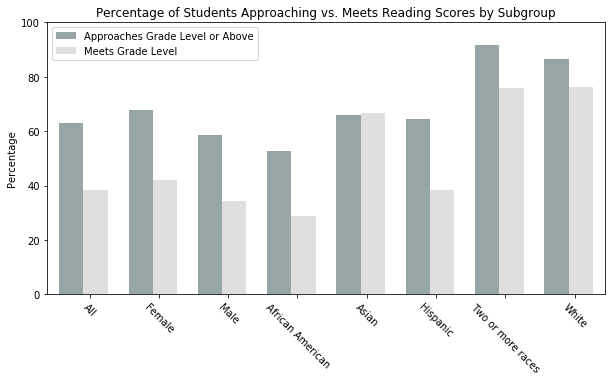

In [43]:
# drop the incomplete rows
results_df.drop(['Pacific Islander', 'American Indian'], inplace = True)

# Setting the positions and width for the bars
pos = list(range(len(results_df['approaches']))) 
width = 0.35
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with 'approaching' data in position pos
plt.bar(pos, results_df['approaches'], width, alpha=0.5, color='darkslategrey') 

# Create a bar with 'meets' data in position pos + some width buffers
plt.bar([p + width for p in pos],results_df['meets'],width, alpha=0.5, color='silver') 

# Set the y axis label
ax.set_ylabel('Percentage')

# Set the chart's title
ax.set_title('Percentage of Students Approaching vs. Meets Reading Scores by Subgroup')

# Set the position and label of the x ticks - label is the index of the dataframe
ax.set_xticks([p + .75 * width for p in pos])
ax.set_xticklabels(list(results_df.index), rotation = -45)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*2)
plt.ylim([0, 100])

# Adding the legend and showing the plot
plt.legend(['Approaches Grade Level or Above', 'Meets Grade Level'], loc = 'best')
plt.show()

## Calculating Percentages by School Type

To calculate the percentages by school type, we'll first create a new dataframe containing only the relevant columns.  Then, we can use the pandas groupby method on the 'GRDTYPE' column and calculate the sum of the groups.  Doing so results in a table containing the summed columns grouped according to their school type.

In [44]:
# create a list with the relevant headers - subgroup = 'All' 
# we'll use this list to select only these four columns from our dataframe
headers = [a_headers['All'][0], a_headers['All'][1], m_headers['All'][0], m_headers['All'][1]]

# create a new dataframe with only the relevant rows, and convert all values to integers
df_new = df[headers].apply(pd.to_numeric, errors= 'raise')

# get the 'GRDTYPE' column from the original DataFrame
df_new['GRDTYPE'] = df['GRDTYPE']

# group by the type of school, and sum the columns
by_school_type = df_new.groupby('GRDTYPE')[headers].sum()
by_school_type

,CA00AR01S17N,CA00AR01017D,CA00AR04217N,CA00AR04217D
GRDTYPE,,,,
B,0,0,0,0
E,24001,35263,13666,34267
M,18528,28710,8735,27895
S,15789,28649,8304,18227


The table above contains the totals by school type, along with an undesired row.  We'll drop the extra row and calculate percentages.

In [45]:
# drop undesired row
by_school_type.drop('B', inplace = True)

# calculate percentages and enter values into new column 
by_school_type['approaches']= by_school_type.iloc[:,0] / by_school_type.iloc[:,1]
by_school_type['meets'] = by_school_type.iloc[:,2] / by_school_type.iloc[:,3]

# drop all columns except for the relevant percentages
by_school_type.drop(by_school_type[headers], axis = 1, inplace = True)

# convert to percentages and round to 2 decimals 
by_school_type = 100* by_school_type
by_school_type.round(2)

,approaches,meets
GRDTYPE,,
E,68.06,39.88
M,64.54,31.31
S,55.11,45.56


## Visualizing the Difference in the Percentage by School Type

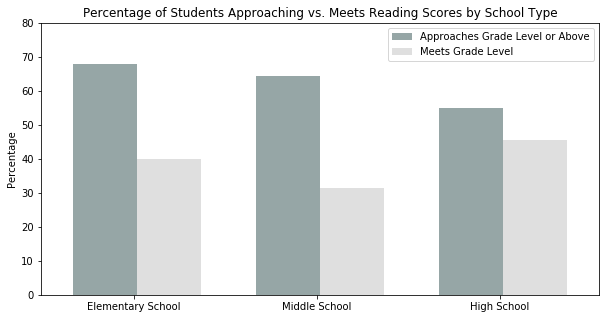

In [46]:
# Setting the positions and width for the bars
pos = list(range(len(by_school_type['approaches']))) 
width = 0.35
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with approaching data in position pos
plt.bar(pos, by_school_type['approaches'], width, alpha=0.5, color='darkslategrey') 

# Create a bar with approaching data in position pos + some width buffers
plt.bar([p + width for p in pos],by_school_type['meets'],width, alpha=0.5, color='silver') 

# Set the y axis label
ax.set_ylabel('Percentage')

# Set the chart's title
ax.set_title('Percentage of Students Approaching vs. Meets Reading Scores by School Type')

# Set the position and label of the x ticks
ax.set_xticks([p + .45 * width for p in pos])
ax.set_xticklabels(['Elementary School','Middle School','High School'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*2)
plt.ylim([0, 80])

# Adding the legend and showing the plot
plt.legend(['Approaches Grade Level or Above', 'Meets Grade Level'], loc = 'best')
plt.show()

## Wrapping Up

Completing this performance task took me longer than 90 minutes because after starting on a basic solution, I changed course and decided to look at the problem in the context of all available data. I realized that after analyzing the reading data, I'd be interested in the other test data, so I developed a framework that would allow me to get the results from every test and every subgroup in an efficient manner.  Doing so required a little more than 90 minutes, however, going beyond this performance task to analyze additional test data would take a fraction of the time invested.

If you are curious about specifics, I can turn my looping solution in the first half of the document into a function.  The function would take as arguments a DataFrame and two dictionaries, and it would return a table with the calculated percentages. The user could completely customize not only which tests and subgroups to calculate percentages from, but which DataFrame to use.  So, for example, if I wanted a breakdown of male vs. female math scores in elementary schools, I could do it by implementing the following:

- Create a new DataFrame containing only elementary schools using pandas groupby.
- Make the dictionaries with the column headers for the tests I want.
- Call the function, passing in the DataFrame and dictionaries.

The function would generate a table of results using only four lines of code.  

Every time I analyze data, I learn something new about python and the data science process. To create a whole report without seeing a single error message would be unrealistic unless it's a specific sequence of functions you use on a daily basis. To troubleshoot error messages, I use strategic Google-ing.  I find myself landing on stack overflow, personal data science blogs, and websites devoted to data science training.  If I need a more comprehensive review, I use my subscriptions to DataCamp and DataQuest to do full courses.  

In this performance task, the most significant thing I learned was creating the visualizations.  Chris Albon is an active data science blogger that I follow, and he has a tutorial for creating a graph similar to what I had in mind for this exercise.  The format and style of my graphs are taken from what I learned in that tutorial.  A smaller issue that sent me to stack overflow was that the DataFrame was of type "object" when it loaded, as opposed to a numeric type. When I attempted to sum the columns, I was getting errors.  Sifting through various forums, I found that by applying the method astype(), I was able to convert the values to floats, which allowed me to follow through with the calculations. 

references:
https://chrisalbon.com/python/data_visualization/matplotlib_grouped_bar_plot/